<h1 style="color:black" align="center">Линейная классификация</h1>

<h1 style="color:#008B8B">1. Линейные модели классификации</h1>

Пусть $\mathbb{X} = \mathbb{R}^d$ пространство объектов.

$\mathbb{Y} = \{-1, +1\}$ - множество допустимых ответов. 
 * Если $y = +1$ - положительный объект
 * $y = -1$ - отрицательный объект.

$X = \{(x_i, y_i)\}_{i = 1}^{\ell}$ - обучающая выборка.

Линейная модель имеет следующий вид: 

$\large a(x) = sign (\langle w, x \rangle + w_0)$

Уравнение $\langle w, x \rangle + w_0 = 0$ определяет гиперплоскость у которой $w$ - это вектор нормали и все точки $x$, которые ему ортогональны лежат на этой гиперплоскости, то есть, определяют гиперплоскость. Соответственно, если точка лежит на гиперплоскости, тогда скалярное произведение будет равно нулю и классификатор отказывается от классификации.

Следовательно, знак скалярного произведения означет с какой стороны от гипрплоскости расположен объект:

 * Если $\langle w, x \rangle + w_0 = 0$ тогда точка лежит на гиперплоскости;
 * Если $\langle w, x \rangle + w_0 < 0$ тогда точка лежит на одной из полуплоскостей;
 * Если $\langle w, x \rangle + w_0 > 0$ тогда точка лежит на второй полуплоскости.
 
<img src="img/4_1.png">

Абсолютная величина скалярного произведения имеет смысл расстояния до разделяющей гиперплоскости. Если объект расположен близко к разделяющей гипперплоскости, тогда небольшое изменение параметров модели может привести к другим ответам на объктах, значит уверенность классификации низкая.

<h2 style="color:#008B8B">1.1 Обучение линейных классификаторов</h2>

Функционал ошибки будет выглядеть следующим образом:

$\large Q(a, X) = \frac{1}{\ell} \sum\limits_{i=1}^{\ell} [a(x_i) = y_i]$ - доля правильных ответов (accuracy)

Нам будет удобнее решать задачу минимизации, поэтому будем вместо этого использовать долю неправильных ответов:

$\large Q(a, X) = \frac{1}{\ell} \sum\limits_{i=1}^{\ell} [a(x_i) \ne y_i]$ - доля ошибок

Если не сказано иначе, мы будем считать, что среди признаков есть константа, $x_{d + 1} = 1$. В этом случае нет необходимости вводить сдвиг $w_0$, и линейный классификатор можно задавать как

$\large a(x) = sign (\langle w, x \rangle)$

Подставим в функцию потерь модель:

$\large Q(a, X) = \frac{1}{\ell} \sum\limits_{i=1}^{\ell} [sign (\langle w, x_i \rangle) \ne y_i] \to \underset{w}{\text{min}}$

**Как оптимизировать функционал?**

Как мы решаем задачи оптимизации? Можем найти точное решение посчитав градиент или использовать градиентный спуск, где в двух случаях необходимо посчитать частные производные функционала по вектору весов. Но, веса расположены под знаком $sign$, который не является дифференцируемой функцией и всё это расположено внутри идникатора, который тоже не является дифференцируемой функцией.

**Выполним преобразование функционала ошибки**

$\large Q(a, X) = \frac{1}{\ell} \sum\limits_{i=1}^{\ell} [y_i \langle w, x_i \rangle < 0] \to \underset{w}{\text{min}}$

Утвержается, что стоит под индекатором $sign (\langle w, x_i \rangle) \ne y_i$ эквивалентно $y_i \langle w, x_i \rangle < 0$.

$\large y_i \langle w, x_i \rangle > 0$ означает, что $y_i$ и $\langle w, x_i \rangle$ одного знака, а если они одного знака, тогда мы правильно угадали класс. Значит, ответ верный.

$\large y_i \langle w, x \rangle < 0$ в данном случае, значение слева меньше нуля, значит $y_i$ и $\langle w, x_i \rangle$ разного знака. Значит, ответ неверный.

### Отступы

$\large Q(a, X) = \frac{1}{\ell} \sum\limits_{i = 1}^{\ell} [\underbrace{y_i \langle w, x_i \rangle}_{M_i} < 0] \to \underset{w}{\text{min}}$

$\large M_i = y_i \langle w, x_i \rangle$ - отступ (margin)

Знак отступа говорит о корректности ответа классификатора. Положительный отступ соответствует правильному ответу, так как $y_i$ и $\langle w, x_i \rangle$ одного знака, а отрицательный отступ соответсвует неправильному ответу.

Абсолютное значение отступа $|M_i|$ это расстояние от $x_i$ до разделяющей гиперплоскости. Если $L_2$ норма вектора весов равна $1$, тогда отступ является расстоянием до разделяющей гиперплоскости. Если $L_2$ норма вектора весов не равна $1$, тогда это отмасштабированное расстояние. Но по идеии, чем больше значение отступа, тем больше расстояние до разделяющей гиперплоскости, значит и уверенность классификатора в своём ответе будет выше.

Если модель уверенна в своём ответе на некотором объекте и она ошиблась, тогда объект скорее всего является выбросом.

### Верхние оценки

$\large Q(a, X) = \frac{1}{\ell} \sum\limits_{i=1}^{\ell} [y_i \langle w, x_i \rangle < 0]$

В данном функционале используется следующая функция потерь:

$\large L(M) = [M < 0]$

Посмторим как данная функция потерь выглядит на графике (синий цвет). Видим, что слева ошибка стоставит 1 и функция потерь за это штрафует одинаково, а справа функция потреь не штрафует, даже при малой уверенности модели:

<img src="img/4_2.png">

Мы можем ввести верхнюю оценку для пороговой функции потерь, чтобы производить обучение модели.

$\large L(M) = [M < 0] \le \tilde L(M)$

После этого можно получить верхнюю оценку на функционал:

$\large 0 \le \frac{1}{\ell} \sum\limits_{i=1}^{\ell} [y_i \langle w, x_i \rangle < 0] 
\le 
 \frac{1}{\ell} \sum\limits_{i=1}^{\ell} \tilde L (y_i \langle w, x_i \rangle) \to \underset{w}{\text{min}}$

И после этого, отсаётся минимизировать верхнюю оценку. Так как изначальный функционал ошибки не меньше нуля и при этом мы минимизруем верхнюю оценку, тогда и доля неправильных ответов тоже станет небольшой. Тем самым, при минимизации верхней оценки она будет маленькой и придавит долю ошибок к нулю.

Если верхняя оценка $\tilde L(M)$ является гладкой, в этом случае её можно будет минимизировать с помощью, например, градиентного спуска. Если верхнюю оценку удастся приблизить к нулю, то и доля неправильных ответов тоже будет близка к нулю.

Приведём несколько примеров верхних оценок:

$\large \tilde L(M) = \log \left(1 + e^{-M} \right)$ - логистическая функция потерь

$\large \tilde L(M) = (1 - M)_+ = \max(0, 1 - M)$-  кусочно-линейная функция потерь (используется в методе опорных векторов)

$\large \tilde L(M) = (-M)_+ = \max(0, -M)$ - кусочно-линейная функция потерь~(соответствует персептрону Розенблатта)

$\large \tilde L(M) = e^{-M}$ - экспоненциальная функция потерь

$\large \tilde L(M) = \frac{2}{1 + e^M}$ - сигмоидная функция потерь

Любая из них подойдёт для обучения линейного классификатора.Позже мы подробно изучим некоторые из них и выясним, какими свойствами они обладают.

Теперь можем минимизировать верхнюю оценку градиентными методами. Получается, любые изученные методы оптимизации будут применимы (Полный градиент, стохастический...). При этом, остается верным все про регуляризацию, подготовку данных для линейной модели, важность масштабирвоания...

<h1 style="color:#008B8B">2. Метрики качества классификации</h1>

<h2 style="color:#008B8B">2.1 Доля правильных ответов</h2>

### Accuracy

$\large accuracy(a, X) = \frac{1}{\ell} \sum\limits_{i=1}^{\ell} [a(x_i) = y_i]$ - долей правильных ответов.

Если выборка несбалансированная, допустим, имеется $950$ здоровых людей (их относим к классу 1) и $50$ людей которые болеют некоторой белезнью (относим к классу -1).

Мы можем посторить такую модель, которая всегда будет возвращать положительный класс (говорит о том, что человек здоров). У этой модели доля верных ответов составит $0.95$. И данная модель нас не устраивает так как цена ошибки различается, для этого введем точность и полноту.

### Относительная ошибка

Если доля ошибок была улучшена с 20% до 10%, то относительное улучшение составляет 50%. Если доля ошибок была улучшена с 50% до 25%, то относительное
улучшение также равно 50%, хотя данный прирост кажется более существенным.
Если же доля ошибок была улучшена с 0.1% до 0.01%, то относительное улучшение
составляет 90%, что совершенно не соответствует здравому смыслу.

|$$r_1$$   |$$r_2$$      |$$r_1 - r_2$$ |$$\frac{r_1 - r_2}{r_1}$$ |
|:--------:|:-----------:|:------------:|:------------------------:|
|20%       |10%          |10%           |50%                       |        
|50%       |25%          |25%           |50%                       |
|0.1%      |0.01%        |0.09%         |90%                       |

<h2 style="color:#008B8B">2.2 Матрица ошибок</h2>

|            |$$y=1$$             |$$y=-1$$             |
|:----------:|:------------------:|:-------------------:|
|$a(x) = 1$  |True Positive (TP)  |False Positive (FP)  |        
|$a(x) = -1$ |False negative (FN) |True Negative (TN)   |


Гораздо более информативными критериями являются точность (precision)
и полнота (recall):

$\large \text{precision(a, X)} = \frac{\text{TP}}{\text{TP} + \text{FP}}$ - Метрика точности, показывает насколько можно доверять модели в случае если $a(x) = +1$. В знаменателе $\text{TP} + \text{FP}$ - это все клиенты, которым был выдан кредит. В числителе $\text{TP}$ - те клиенты, которые вернули кредит. 

Почему этого показателя недостаточно? Модель может выдать кредит только одному пользователю и $\text{precision}$ будет 100%, но модель может не выдавать кредит людям, которые его бы вернули.

$\large \text{recall(a, X)} = \frac{\text{TP}}{\text{TP} + \text{FN}}$ - Метрика полноты, показывает насколько задействованы клиенты, которые вернули бы кредит.

В знаменателе $\text{TP} + \text{FN}$ - стоят все те, кто обязательно вернут кредит. В числителе $\text{TP}$ - те клиенты, которые вернули кредит. 

**Как это использовать?**

1. Для оценки аспектов качества модели после обучения.

2. Можно зафиксировать $\text{precision} \ge 0.9$, дальше можно выполнить перебор порогов, выбрать модель с $\text{precision} \ge 0.9$  и максимальным значением $\text{recall}$.

<h2 style="color:#008B8B">2.3 Объединение точности и полноты</h2>

<!-- ## Объединение точности и полноты -->

Основная проблема $\text{precision}$ и $\text{recall}$ заключается в том, что у нас две оценки модели, возникает желание объеденить $\text{precision}$ и $\text{recall}$, чтобы получить еденый показатель, который бы отражал $\text{precision}$ и $\text{recall}$.

### Арифметическое среднее

|                    |$\text{Model 1}$   |$\text{Model 2}$   |
|:------------------:|:-----------------:|:-----------------:|
|$\text{precision}$  |$0.1$              |$0.55$             |        
|$\text{recall}$     |$1$                |$0.55$             |

$\large A = \frac{1}{2} (precision + recall)$

$\large \text{A(Model 1)} = 0.55$

$\large \text{A(Model 2)} = 0.55$

Несмторя на то, что вторая модель лучше первой (так как первая модель константная - на всех объектах предсказывает один класс), среднее арифметическое имеет одно значение. Можем заметить, что эти два алгоритма расположены на одной линии уровня.

<img src="img/4_3.png">

### Минимум

$\large \text{MIN} = min(precision, recall)$ 

Подход с взятием минимума решает проблему для модели выше. Но у этой модели имеетсся другая проблема. Предположим у нас есть две модели:

|                    |$\text{Model 1}$     |$\text{Model 2}$   |
|:------------------:|:-------------------:|:-----------------:|
|$\text{precision}$  |$0.4$                |$0.4$              |        
|$\text{recall}$     |$0.5$                |$0.9$              |

У двух моделей точность равна $0.4$, но полнота первой модели $0.5$, а второй модели $0.9$. И несложно понять, что второй алгоритм лучше. Но минимум у двух моделей будет равен $0.4$.

Если начинает возрастать второй парамтр, тогда оцнка не сможет использовать эту информацию. Это хорошо видно на линиях уровня, если зафиксировать один параметр и увеличивать другой, то линия уровня будет прямой.

<img src="img/4_4.png">

### F-Мера

Решением данной проблемы становится метрика гармонического среднего:

$\large F = \frac{2 \cdot \text{precision} \cdot \text{recall}}{\text{precision} + \text{recall}}$

$\text{Model}_1 = 0.44$

$\text{Model}_2 = 0.55$

Как видно, вторая модель лучше. Вторая точка будет расположена вверхнем углу на салатовой линии уровня. Если мы зафиксируем, напрмер, $\text{precision}$ и будем увеличивать $\text{recall}$, тогда F-мера будет увеличиваться, так как мы будем переходить на более высокие линии уровня, а не оставаться на одном как это было с арифметическим средним или минимумом.

Имеется модификация F-меры, которая позволят выбрать что важнее, точность или полнота:

$\large F_{\beta} = (1 + \beta^2) \frac{\text{precision} \cdot \text{recall}}{\beta^2 \text{precision} + \text{recall}}$

<img src="img/4_5.png">

1. Если посмотреть на линии уровня c $\beta = 2$. Что здесь важнее, точность или полнота? Зафиксируем $\text{precision}$ и будем увеличивать $\text{recall}$, тогда мы будем переходить на другие линии уровня, значит F-мера будет изменятся. Но если зафиксировать $\text{recall}$ и изменять $\text{precision}$, тогда F-мера будет лежать на одной линии уровня. Получается, что здесь важнее $\text{recall}$ (полнота).

2. Если посмотреть на линии уровня c $\beta = 0.5$. Нам будет важнее $\text{precision}$ (точность).

### Геометрическое среднее

$\large G = \sqrt{\text{precision}\cdot \text{recall}}$

Геометрическое среднее более чувстивтельно к выбросам. Рассчитаем показатели для гармонического среднего меры и геометрического среднего:

$\large \text{precision} = 0.9 \quad \text{recall} = 0.1$

$\large \text{F} = 0.18 \quad \text{G} = 0.3$

И получается, что геометрическое среднее ближе к среднему арифметическому, чем гармоническое среднее. Это хорошо видно на линиях уровня функции. У гармонического среднего линии уровня как будто притягиваются к нулю, а у геометрического это не так выражено и возле еденицы линии уровян почти похожи на линии уровян арифметического среднего.

In [1]:
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline
%config InlineBackend.figure_format = 'png'

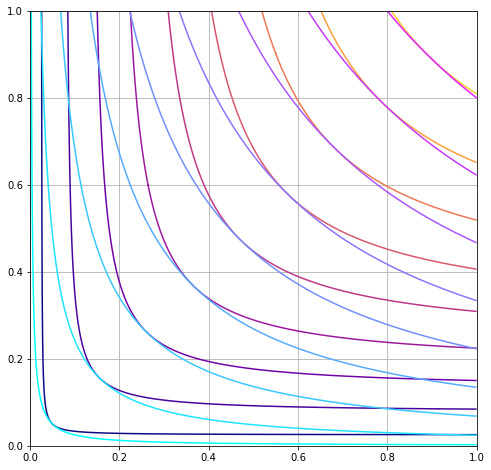

In [20]:
# Формирование точек
x, y = np.mgrid[0.001:1:1000j, 0.001:1:1000j]

fig, ax = plt.subplots()

z = (2 * x * y) / (x + y)
cont = ax.contour(x, y, z, levels=np.linspace(0.05, 1, 10), cmap='plasma')
ax.clabel(cont, inline=0, fontsize=0)

z = np.sqrt(x * y)
cont = ax.contour(x, y, z, levels=np.linspace(0.05, 1, 10), cmap='cool')
ax.clabel(cont, inline=0, fontsize=0)

fig.set_figwidth(8)    #  ширина и
fig.set_figheight(8)    #  высота "Figure"
ax.set_ylim(0, 1)
ax.set_xlim(0, 1)
ax.grid()

# plt.savefig('saved_figure.png')
plt.show()

### Lift

$\large \text{lift} = \frac{\text{precision}}{(\text{TP} + \text{FN}) / \ell}$

Предположим, приемная компания способна обработать $200$ человек. Для этого построим модель, которая будет определять заинтересуется ли человек поступлением в ВУЗ, дальше необходимо подобрать такой прог $t$ чтоб к положительному классу относилось $200$ объектов и после приемная компания может взаимодействовать с $200$ людьми, которые отобрала модель.

Дальше можем посчитать $\text{precision}$, который покажет насколько модель хорошо определила $200$ положительных объектов (Сколько человек из $200$ реально поступили ВУЗ). 

Возникает вопрос, а насколько это лучше, если бы мы взяли $200$ случайных человек, а не использовали модель. В метрике $\text{Lift}$ в числителе стоит концентрация положительных объектов при отборе модели, а в знаменателе концентрация положительных объектов в случайной подвыборке. Значит, метрика $\text{Lift}$ показывает насколько модель лучше отбирает положительные объекты, чем случайна выборка.

<h1 style="color:#008B8B">3. Метрики качества ранжирования</h1>

Вспомним как устроен линейный классификатор:

$\large a(x) = sign (\langle w, x \rangle)$ 

и модель возвращает число из множества $1$ или $-1$ $a(x) \in \{-1, +1\}$

Модифицируем классификатор следующим образом:

$\large a(x) = sign (\langle w, x \rangle - t)$ 

$\large a(x) = [\langle w, x \rangle > t]$

Мы хотим, чтобы классификатор относил к положительному классу объект только тогда, когда модель уверена в этом. Для этого необходимо взять значение $t$ больше $0$. Хорошим примером является удержание клиента для мобильного оператора. Так как число операторов в колд-центре ограничено, необходимо повысить порог и пытаться удержать тех клиентов, в которых модель машинного обучения более уверена. Таким образом, снижается количество пользователей которых модель относит к положителльному классу и повышается число пользователей которых модель относит к отрицательному классу.

Если упорядочить всю объекты по уверенности классификатора, дальше рядом сопоставить к какому классу относится объект, выбирая порог, мы сможем регулировать количество верных сробатываний модели. В идеальной модели сначало будут идти все классы $+1$, после все классы с $-1$, а если модель окажется плохой, тогда классы объектов будут скорее всего перемещаны.

Порог способен регулировать точность и полноту, если порог окажется слишком высоко у нас будет возрастать точность, но падать полнота, так как останется много не задействованых положительных объектов.

Как подобрать порог?

1. Из цены ошибки.

2. Из требований к количеству положительных классов.

3. Из требований к точносте и полноте.

**Зачем это нужно?**

После обучения классификатора мы получаем семейство классификаторов, так как можно выбрать порог $t$, который позволяет регулировать соотношение точности и полноты. И нам хочется до выбора порога измерить то, насколько семейство моделей получилось хорошим, насколько гибко можно настроить порог у модели. Для этого используются методы оценки того, насколько хорошо модель упорядочила объекты, эти методы позволяют оценить качество модели в среднем по всем порогам.

<h2 style="color:#008B8B">3.1 ROC - кривая</h2>

Делим ошибочные предсказания модели на количество объектов отрицательного класса:

$\large \text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}}$ - доля отрицательных объектов, которые были отнесены к положительному классу, среди всех объектов отрицательного класса.

Делим верные прдесказания модели на количество объектов положительного класса:

$\large \text{TPR} = \frac{\text{TP}}{\text{TP} + \text{FN}}$ - $\text{recall}$

Запишем для общего вида моделей, не только для линейных. Тогда, предпологаем, что модель имеет следующий вид:

$\large a(x) = [b(x) > t]$, где $b(x)$ - показатель уверенности, в случае линейной модели $b(x) = \langle w, x \rangle$.

Теперь отсортируем все объекты выборки по уровню уверенности модели, в порядке $b(x_{(1)}) \le b(x_{(2)}) \le \ldots \le b(x_{(\ell)})$. Дальше необходимо выбрать пороги так, чтоб каждый последующий порог отсекал на $1$ объект больше. Всего различных порогов имеется $\ell + 1.$


|            |$$y=1$$             |$$y=-1$$             |
|:----------:|:------------------:|:-------------------:|
|$a(x) = 1$  |True Positive (TP)  |False Positive (FP)  |        
|$a(x) = -1$ |False negative (FN) |True Negative (TN)   |

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

data = pd.DataFrame({'b(x)': [0.90, 0.73, 0.52, 0.39, 0.23, 0.14], 
                     'y': [1, 1, 0, 0, 1, 0]}, 
                    index=['$b(x_6)$', '$b(x_5)$', '$b(x_4)$', '$b(x_3)$', '$b(x_2)$', '$b(x_1)$'])
data

,b(x),y
$b(x_6)$,0.90,1
$b(x_5)$,0.73,1
$b(x_4)$,0.73,0
$b(x_3)$,0.39,0
$b(x_2)$,0.23,1
$b(x_1)$,0.14,0


### Построение ROC-кривой

Процесс построения **ROC** кривой заключается в том, что мы проходим по всем порогам и для каждого порога считаем значение *FPR* и *TPR*:

* Первый порог $t_{\ell + 1}$ - ни один объект не относит к положительному классу (все объекты относятся к отрицательному). 

  Тогда, $\text{FPR} = 0, ~ \text{TPR} = 0$


* Второй порог $t_{\ell}$ - один объект относит к положительному классу и мы сделали это правильно. 

  $\text{FPR} = 0, ~ \text{TPR} = \frac{1}{\text{TP} + \text{FN}}$, но если $y$ будет относиться к отрицательному классу, тогда $\text{FPR} = \frac{1}{\text{FP} + \text{TN}}, ~ \text{TPR} = 0$


* Третий порог $t_{\ell - 1}$ - два объекта относит к положительному классу и мы сделали это правильно.

* Четвёрный порог $t_{\ell - 2}$ - три объекта относит к положительному классу и третий объект оказывается в FP.

И так далее...

На последнем пороге все объекты будут отнесены к положительному классу, значит и все объекты из отрицательного класса будут отнесены к положительному. Поэтому *FPR = TPR = 1* и гарантированно мы начинам график с нуля и заканчиваем в точке *(1, 1)*.

**Данное построение является не правильным!!!**

In [18]:
def roc(predict, y):
    tn, fp, fn, tp = confusion_matrix(y, predict).ravel()
    new_tp, new_fp = 0, 0
    TPR, FPR = [0], [0]
    
    for i in range(len(y)):
        if y[i]:
            new_tp += 1
        else:
            new_fp += 1
        TPR.append(new_tp / tp + fn)
        FPR.append(new_fp / fp + tn)
    
    return TPR, FPR

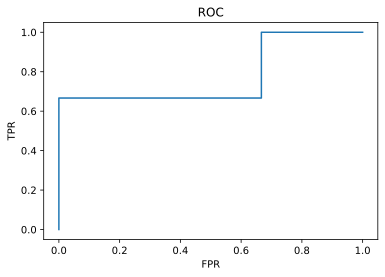

In [19]:
TPR, FPR  = roc([1 for i in range(len(data['y']))], data['y'].values)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')

plt.plot(FPR, TPR)
plt.show()

Рассмотрим переход от порога $t_{\ell + 1}$ к $t_{\ell}$ и если при переходе объект относится к классу *TP*, тогда на графике мы будем подниматься вверх, а если объект относится к лассу *FP* тогда мы будем смешаться вправую сторону.

Если все значения *b(x)* отсортированы по возрастанию, тогда: 

(-1, -1, -1, -1, (идеальный порог) 1, 1, 1, 1 ($t_{\ell+1}$ порог))

тогда на графике до идеального порога мы будем только подниматься вверх и значение TPR будет равняться одному, а после идеального порога график начнёт сдвигаться вправую сторону, так как доля ошибок (*FPR*) начёт стремится к $1$. И площадь под *ROC* кривой будет равна $1$ - это называется *AUC-ROC*

Если модель чарядует отрицательные и положитлеьные объкты, тогда ROC крвивая будет ступенчатая. Здесь *AUC-ROC* составит $\frac{1}{2}$.

Также *ROC* кривая может вдавлена вниз, это означает что модель предсказывает обратное значение:

(1, 1, 1, 1, (идеальный порог) -1, -1, -1, -1)

Данная модель хорошая, только её необходимо инвертировать, тогда модель будет возвращать правильный прогноз.

**Индекс Джини** измеряется следующим образом:

$\large \text{gini} = 2 \cdot \text{AUC-ROC} - 1$

С геометрической точки зрения, проводится диагональная линия, после строится *ROC-кривая* и рассчитывается удвоенная полощадь между *ROC-кривой* и диагональной линией.

**Интерпретация AUC-ROC**

Вспомним что *ROC-кривая* измеряет долю верных и ложных срабатываний. Доля ложных срабатыванй делится на размер негативного класса, а доля верных срабатываний на размер положительного класса. Засчёт того, что величины делятся на объёмы классов, площадь под *ROC-кривой* не зависит от баланса классов. То есть, если свойства объектов в выборке остаются такими же, а соотношение классов изменится, тогда пдощадь под *ROC-кривой* не изменится.

Фактически *AUC-ROC* это еденица минус доля деффектных пар. Другими словами, можно взять все пары объектов и посчитать сколько пар, где ноль расположен выше еденицы (пары где объекты неправильно упорядочены), а если от еденицы отнять эту долю неправильно упорядоченных объектов, тогда получим долю правильных пар *AUC-ROC*.

<h2 style="color:#008B8B">3.2 AUC-PRC</h2>


Площадь данной метрики зависит от точности и полноты. При этом в точности, нормировка производится не на размер положитеьного класса, а на число срабатываний алгоритма, таким образом если изменится соотношения классов, тогда изменится точность, значит площадь под *PRC-кривой* будет зависить от соотношения классов.

**Итерпретация AUC-PRC и AUC-ROC при несбалансированной выборке**

Если модель отсортировала объекты по $b(x)$ следующим образом:

* Сначало расположены $50 000$ объектов отрицательного класса;
* Дальше, $100$ объектов положительного класса;
* Остальные $950 000$ объектов отрицательного класса.

Заметим, что $100$ объектов положительного класса оказались довольно далеко от начала, так как сначало идёт $50 000$ отрицательных объектов. Данная сортировка нас не устраивает. При этом, 

площадь под *ROC-кривой* составит $\text{AUC-ROC} = 0.95$

площадь под *PRC-кривой* составит $\text{AUC-PRC} = 0.001$

**Почему площадь под *ROC-кривой* оказалась большой?**

Возьмём порог при котором к положительному классу будет отнесены $50 000$ объектов негативного класса и $95$ объектов положительного класса. Данный классификатор будет иметь много ложных срабатыванийя, которых будет $50 000$, а верных всего $95$. Тогда, доля верных срабатываний будет равна $\text{TPR}= \frac{95}{100} = 0.05$, а доля ложны срабатываний составит $\text{FPR}= \frac{50000}{1000000} = 0.95$, поскольку нормировка производится по размеру всего отрицательного класса, а $50 000$ это мало по сравнению с миллионом объектов отрицательного класса. Данная точка лежит близко к точке с координатами $(0, 1)$ из-за чего *ROC-кривая* будет иметь почти идеальный вид, площадь составит $95\%$.

В данном случае, точность и полнота алгоритма хорошо отражает ситуацию. Полнота составит $95\%$, а поскольку много ложных срабатываний у модели, тогда точность будет менее одного процента. И площадь точности и полноты лучше отражает ситуацию с несбалансированными выборками.

### Построение AUC-PRC

Процесс построения **PRC** кривой заключается в том, что мы проходим по всем порогам и для каждого порога считаем значение *precision* и *recall*:

* Первый порог $t_{\ell + 1}$ - ни один объект не относит к положительному классу (все объекты относятся к отрицательному). 

  Тогда, $\text{recall} = 0$, так как мы оцениваем какую долу объектов положительного класса модель отнесла к положительному. Число объектов которые модель верно отнесла к положительному классу деленное на число объектов, которые модель отнесла к положительного класса будет равняться $\text{precision} = 1$. Тем самым, мы начинаем с точки (0, 1).


* Последний порог $t_{1}$ - все объекты относим к положительному классу, тогда $\text{recall} = 1$, так как все объекты отнесены к положительному классу. А вот $\text{precision}$ будет зависить от данных и будет равняться количеству объектов положительного класса деленное а общее количество объектов, тем самым точка остановки для каждый выборки будет разной.


**Какое значение будет оптимальным для AUC-PRC?**

У данной метрики нет физического смысла. Например, мы получили значение равное $0.4$, и для определения, хорошее это значение или нет, необходимо построить AUC-PRC для идеального ранжирования нашей выборки (сортируем по $y$ и считаем идаельное значение).

**Почему метрики качества ранжирования?**

Если изменить качество на $b(x_{\ell -1}) + \epsilon$ объекте, так чтобы не изменился порядок, тогда значение AUC-PRC не изменится. Следовательно, значение метрики зависит не от конкретных значений $b(x)$, а от того, как $b(x)$ упорядочивает объекты относительно друг-друга.